<a href="https://colab.research.google.com/github/MavClarito/Emerging-Tech-2/blob/main/Clarito_Hands_on_Activity_5_2_Build_and_Apply_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Hands-on Activity 5.2: Build and Apply Multilayer Perceptron** |
**Members:** | Clarito, Vincent Maverick
**Section** | CPE32S9
**Date Performed**: | 03/20/2024
**Date Submitted**: | 03/20/2024
**Instructor**: | Engr. Roman M. Richard

<hr>

In this assignment, you are task to build a multilayer perceptron model. The following are the requirements:

***Choose any dataset: https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types***

***Explain the problem you are trying to solve***

***Create your own model***

***Evaluate the accuracy of your model***


In [50]:
!pip install np_utils

This is the list of all the files present in the path given to us:

['aipom.png', 'cacnea.png', 'butterfree.png', 'bronzor.png', 'braviary.png', 'bronzong.png', 'boldore.png', 'blaziken.png', 'bounsweet.png', 'bouffalant.png', 'blitzle.png', 'blissey.png', 'bonsly.png', 'brionne.png', 'armaldo.png', 'aromatisse.png', 'avalugg.png', 'ariados.png', 'azelf.png', 'ampharos.png', 'amoonguss.png', 'araquanid.png', 'amaura.png', 'anorith.png', 'altaria.png', 'ambipom.png', 'breloom.png', 'braixen.png', 'aggron.png', 'aerodactyl.png', 'absol.png', 'aegislash-blade.png', 'accelgor.png', 'abra.png', 'azurill.png', 'barbaracle.png', 'bagon.png', 'basculin-red-striped.png', 'banette.png', 'bayleef.png', 'bewear.png', 'bergmite.png', 'bellsprout.png', 'bellossom.png', 'bibarel.png', 'beheeyem.png', 'beldum.png', 'archeops.png', 'aron.png', 'audino.png', 'articuno.png', 'bastiodon.png', 'arcanine.png', 'blacephalon.png', 'bisharp.png', 'blastoise.png', 'archen.png', 'beartic.png', 'azumarill.png', '

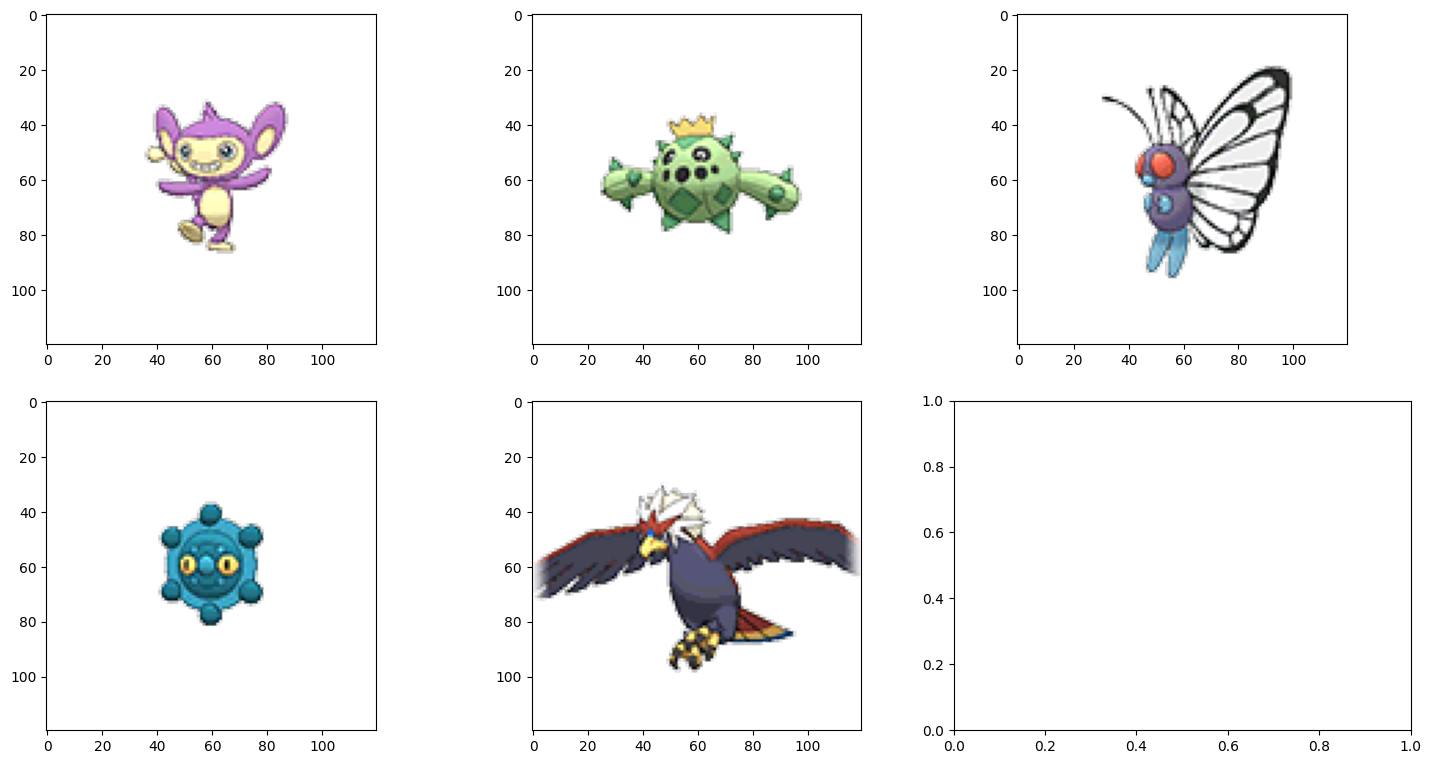

In [51]:
from PIL import Image
import os
import matplotlib.pyplot as plt
root_dir = "/content/drive/My Drive/Datasets/images"

files =  os.path.join(root_dir)
File_names = os.listdir(files)
print("This is the list of all the files present in the path given to us:\n")
print(File_names)

# plot here
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
first_five = File_names[0:6]

def subplots():
# Use the axes for plotting
    i = 0
    j = 0
    k = 0
    for k in range(5):
        state = os.path.join(root_dir, first_five[k])
        img = Image.open(state)
        axes[i,j].imshow(img)

        if k==2:
            i +=1
            j = 0
        else:
            j += 1


    plt.tight_layout(pad=2);

subplots()

In [52]:
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
import np_utils

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
PokemonDf = pd.read_csv('/content/drive/My Drive/Datasets/pokemon.csv')

In [55]:
PokemonDf.head()

,Name,Type1,Type2,Evolution
0,bulbasaur,Grass,Poison,ivysaur
1,ivysaur,Grass,Poison,venusaur
2,venusaur,Grass,Poison,NaN
3,charmander,Fire,NaN,charmeleon
4,charmeleon,Fire,NaN,charizard


In [56]:
data_dict = {}

for key, val in zip(PokemonDf["Name"], PokemonDf["Type1"]):
    data_dict[key] = val
print(data_dict)

{'bulbasaur': 'Grass', 'ivysaur': 'Grass', 'venusaur': 'Grass', 'charmander': 'Fire', 'charmeleon': 'Fire', 'charizard': 'Fire', 'squirtle': 'Water', 'wartortle': 'Water', 'blastoise': 'Water', 'caterpie': 'Bug', 'metapod': 'Bug', 'butterfree': 'Bug', 'weedle': 'Bug', 'kakuna': 'Bug', 'beedrill': 'Bug', 'pidgey': 'Normal', 'pidgeotto': 'Normal', 'pidgeot': 'Normal', 'rattata': 'Normal', 'raticate': 'Normal', 'spearow': 'Normal', 'fearow': 'Normal', 'ekans': 'Poison', 'arbok': 'Poison', 'pikachu': 'Electric', 'raichu': 'Electric', 'sandshrew': 'Ground', 'sandslash': 'Ground', 'nidoran-f': 'Poison', 'nidorina': 'Poison', 'nidoqueen': 'Poison', 'nidoran-m': 'Poison', 'nidorino': 'Poison', 'nidoking': 'Poison', 'clefairy': 'Fairy', 'clefable': 'Fairy', 'vulpix': 'Fire', 'ninetales': 'Fire', 'jigglypuff': 'Normal', 'wigglytuff': 'Normal', 'zubat': 'Poison', 'golbat': 'Poison', 'oddish': 'Grass', 'gloom': 'Grass', 'vileplume': 'Grass', 'paras': 'Bug', 'parasect': 'Bug', 'venonat': 'Bug', 've

In [57]:
labels = PokemonDf["Type1"].unique()
print(labels)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [58]:
ids = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
labels_idx = dict(zip(labels,ids))

print(labels_idx)

{'Grass': 0, 'Fire': 1, 'Water': 2, 'Bug': 3, 'Normal': 4, 'Poison': 5, 'Electric': 6, 'Ground': 7, 'Fairy': 8, 'Fighting': 9, 'Psychic': 10, 'Rock': 11, 'Ghost': 12, 'Ice': 13, 'Dragon': 14, 'Dark': 15, 'Steel': 16, 'Flying': 17}


In [59]:
final_images = []
final_labels = []
count = 0
files =  os.path.join(root_dir)
for file in File_names:
    count += 1
    img = cv2.imread(os.path.join(root_dir, file), cv2.COLOR_BGR2GRAY)
    label = labels_idx[data_dict[file.split(".")[0]]]
    final_images.append(np.array(img))
    final_labels.append(np.array(label))

final_images = np.array(final_images, dtype = np.float32)/255.0
final_labels = np.array(final_labels, dtype = np.int8).reshape(809, 1)

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(120, 120,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(18)
])
# print model summary and check trainable parameters
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 43200)             0         
                                                                 
 dense_12 (Dense)            (None, 100)               4320100   
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 18)                1818      
                                                                 
Total params: 4342118 (16.56 MB)
Trainable params: 4342118 (16.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# fit model (use images and labels)
history = model.fit(final_images, final_labels, epochs=10)

Epoch 1/10
26/26 [==============================] - 5s 127ms/step - loss: 3.0088 - accuracy: 0.1112
Epoch 2/10
26/26 [==============================] - 2s 78ms/step - loss: 2.5362 - accuracy: 0.2138
Epoch 3/10
26/26 [==============================] - 2s 91ms/step - loss: 2.2589 - accuracy: 0.2930
Epoch 4/10
26/26 [==============================] - 3s 100ms/step - loss: 1.9540 - accuracy: 0.4030
Epoch 5/10
26/26 [==============================] - 2s 75ms/step - loss: 1.6089 - accuracy: 0.5068
Epoch 6/10
26/26 [==============================] - 2s 76ms/step - loss: 1.3501 - accuracy: 0.5896
Epoch 7/10
26/26 [==============================] - 2s 77ms/step - loss: 0.9870 - accuracy: 0.7182
Epoch 8/10
26/26 [==============================] - 2s 79ms/step - loss: 0.8452 - accuracy: 0.7553
Epoch 9/10
26/26 [==============================] - 2s 65ms/step - loss: 0.6744 - accuracy: 0.8121
Epoch 10/10
26/26 [==============================] - 2s 91ms/step - loss: 0.5311 - accuracy: 0.8529


In [62]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(final_images)

print("\n",predictions[0])
id = np.argmax(predictions[0])
print("\nid that we got from the model as prediction: {}\nType of pokemon associted with that id: {} ".format(id,labels[id]))
print("accuracy of the model",history.history['accuracy'][-1])

26/26 [==============================] - 0s 15ms/step

 [2.0868930e-03 3.9894623e-04 8.1140868e-04 1.1162478e-03 8.5610926e-01
 6.1494746e-04 4.5004036e-02 9.1571608e-05 2.3815457e-03 2.9531782e-03
 6.6675141e-02 7.1539716e-03 2.6470730e-03 4.3962235e-03 9.1471316e-05
 7.4293036e-03 3.6481299e-05 2.2491204e-06]

id that we got from the model as prediction: 4
Type of pokemon associted with that id: Normal 
accuracy of the model 0.8529047966003418


**Explain the problem you are trying to solve:**

The problem I'm trying to solve is the type of pokemon.

**Evaluate the accuracy of your model:**

The accuracy of my model show's 85% which is decent but not good enough especially I wanna determine the pokemon and its type. In order for me to increase the accuracy I have to increase the number of epoch.